In [2]:
#Training a simple linear regression model using the normal equation to normalize 

In [3]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
#Lets just generate some linear looking data to test the equation

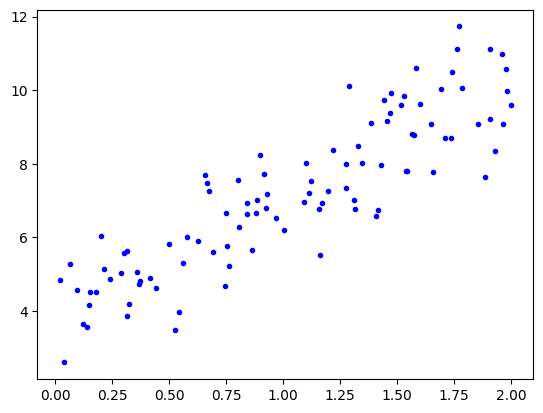

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")

In [5]:
#Now lets compute ~θ (value of θ that minimizes the cost function) using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #(X^T*X)^-1 * X^T * y 

In [6]:
theta_best #Note that the original equation is y = a + bx + Gaussian noize

array([[3.87990446],
       [3.16833906]])

In [7]:
#Now you can make predictions using ~θ:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict #well... its seems pretty accurate 

array([[ 3.87990446],
       [10.21658257]])

In [8]:
#So to normalize a linear regression, we add a value 1 to every instance and then we find ~θ that normalizes the matrix using (X^T*X)^-1 * X^T * y 
#That's pretty much it...

In [9]:
#Plus we can also use Scikit learn inbuilt tools.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
#We are very familiar with this one

(array([3.87990446]), array([[3.16833906]]))

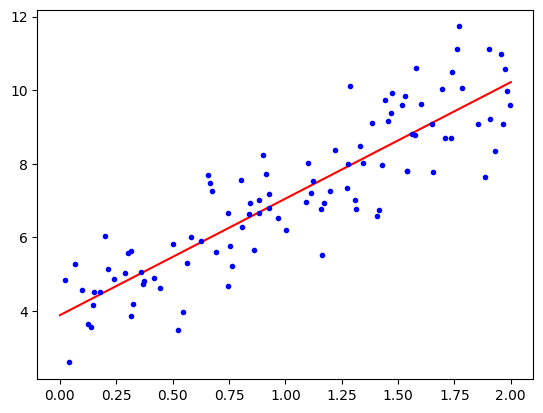

In [10]:
#Let’s plot this model’s predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [11]:
#Now we will look at very different ways to train a Linear Regression model, better
#suited for cases where there are a large number of features, or too many training instances to fit in memory.

In [12]:
#Gradient Descent:
    #BGD: Batch Gradient Descent(Uses the entire data for each iteration):
        #θ(next step) = θ − η(∇θ MSE θ) where ∇θ MSE θ = 2/m(X^T*(X*θ - y))
eta = .1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)


[[3.87990446]
 [3.16833906]]


In [13]:
#SGD: Stochastic Gradient Descent(unlike BGD, SGD uses a random portion of the dataset at each iteration which makes it faster)
#and easier to run.

def learning_schedule(t): 
    return t0 / (t + t1)
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[3.88950089]
 [3.1986016 ]]


In [14]:
#we can also use scikit learn to perform SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_  

(array([3.85997898]), array([3.13781997]))

In [16]:
#And last but not least... Mini-batch Gradient Descent(MiniBGD)
#Well as the name suggests, it uses small porion of the data at each iteration, insed of all and instead of a random instance.
eta = .1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

num_rows, num_cols = X_b.shape

for iteration in range(n_iterations):
    # Select 50 random elements along axis 0 (rows):
    random_rows = np.random.choice(num_rows, size=50, replace=True)
    #Get the mini batches:
    mini_X_b = X_b[random_rows, :]
    mini_y = y[random_rows, :]
    #Obtain the gradient using mini batches
    gradients = 2/m * mini_X_b.T.dot(mini_X_b.dot(theta) - mini_y)
    theta = theta - eta * gradients
print(theta)

[[3.879322  ]
 [3.13156412]]


In [17]:
#SVD: Well numpy provides a way to perform linear regression(this should be before GRADIENT DECENT).
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.87990446],
       [3.16833906]])

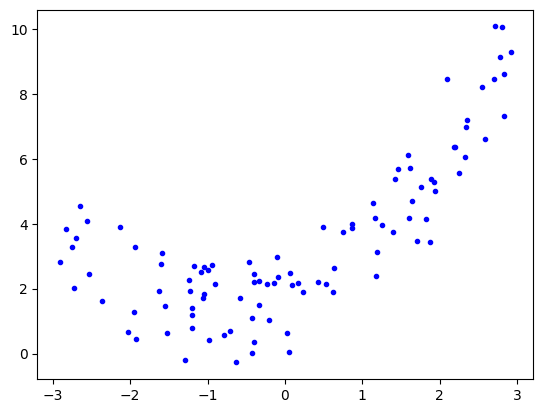

In [18]:
#What if our data is acually more complex than a simple line?
#Surprisingly, you can actually use a linear model to fit nonlinear data.
#A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended
#set of features. This technique is called POLYNOMIAL REGRESSION.

#POLYNOMIAL REGRESSION
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #as you can see y is a quadratic equation instead of a line eqn.
plt.plot(X, y, "b.")

In [28]:
#To otain a regression model on this dataset, we must first create another column whose elements are the square of the elements in the previous column
#we can use scikit learn to perform this task: 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]# As seen below, the X_poly array contains 2 columns the second being the square of the first
#Now we can fit a linear regressor on this new data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ #well it tells us the intercept c , the value of b and lastly the value of a (using ax^2 +bx +c)


(array([1.91324017]), array([[0.93591333, 0.52618999]]))

In [31]:
x_new = poly_features.fit_transform(6 * np.random.rand(7, 1) - 3)
y_predict = lin_reg.predict(x_new)

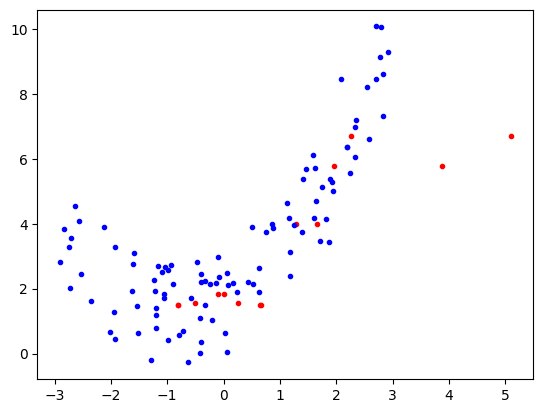

In [32]:
plt.plot(x_new, y_predict, "r.")
plt.plot(X, y, "b.")

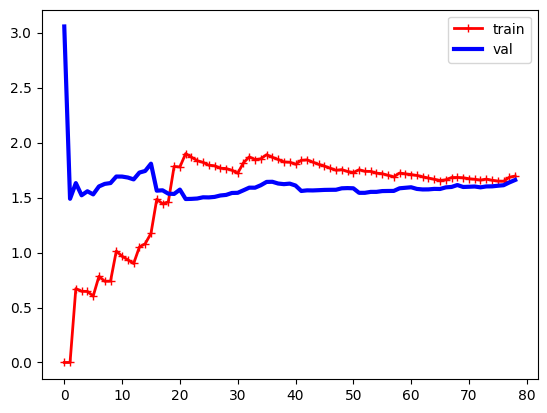

In [22]:
#Now we were able to et such an accurate model because we set the poly features degree to 2, this is because we know that we are
#indeed dealink with a polynomial of degree 2, but in the case where we have no idea the degree of the polynomial.
#we become more suject to overfitting or under fitting the dataset.
#So the big question is ow do we know wen our model is fittin the data perfectly, well one way is to use cross val score, or we can plot
#a graph of the RMSE of the model on the training set vs the RMSE of the model on the validation set like this:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()
#These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

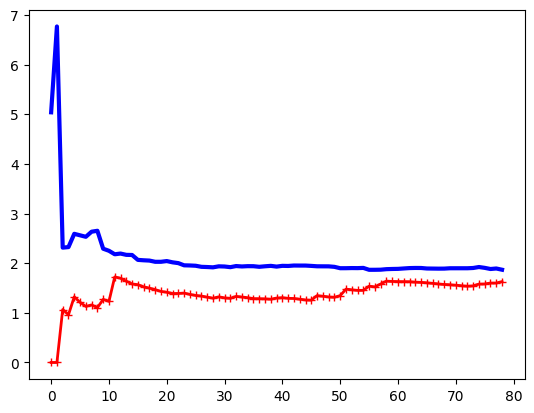

In [23]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
 ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)

In [33]:
#Regularized linear regression models.
#    Ridge Regression model:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)


Ridge(alpha=1, solver='cholesky')

In [34]:
ridge_reg.predict([[1.5]])

array([[4.91732046]])

In [35]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
#well that's that on ridge regression.

array([4.91330272])

In [36]:
#Lasso regression:
#Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression)
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
#That's how you perform a lasso regression.

array([4.8714119])

In [44]:
#Elastic Net
#Elastic Net is a middle ground between Ridge Regression and Lasso Regression. 
#The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. 
#When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.87086158])

In [ ]:
#Early stoppinng: wel observr the RMSE of the validation set and training set as soon as the slope of the Val set begins to rise,
#Put a stop to the training process and locate the best model which is the lowest point of the slope.
from sklearn.base import clone
# prepare the data
poly_scaler = Pipeline([
 ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
 ("std_scaler", StandardScaler())
 ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)


In [75]:
#Logistic Regression: well acts more like classification return the probability of belonging to a particular class.
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 2:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

In [76]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

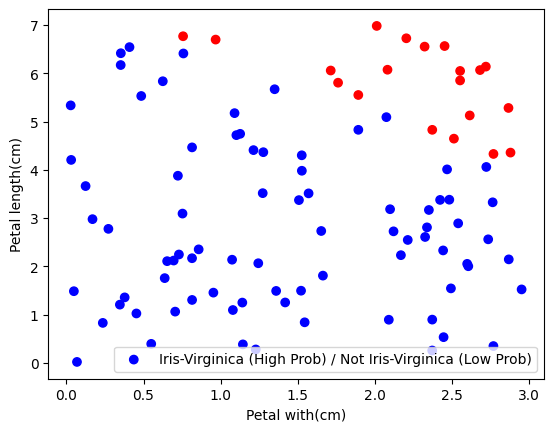

In [101]:
#Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
x1 = 3 * np.random.rand(100, 1) 
x2 = 7 * np.random.rand(100, 1) 
X_new_lw = np.hstack((x1, x2))
y_proba = log_reg.predict_proba(X_new_lw)
threshold = 0.6
is_virginica = y_proba[:, 1] >= threshold

# Plot the data
plt.scatter(X_new_lw[:, 0], X_new_lw[:, 1], c=is_virginica, cmap='bwr', label="Iris-Virginica (High Prob) / Not Iris-Virginica (Low Prob)")
plt.ylabel("Petal length(cm)")
plt.xlabel("Petal with(cm)")
plt.legend()

In [72]:
log_reg.predict([[1.5], [1.66], [1.661], [1.7]])
#As seen there's a decision boundary at d 1.66 petal width, at <=1.66, the model predicts 0 and at >=1.661 the model predicts 1

array([0, 0, 1, 1])

In [105]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [116]:
#Softmax regression: 
#The Logistic Regression model can be generalized to support multiple classes directly,
#without having to train and combine multiple binary classifiers This is called Softmax Regression, 
#or Multinomial Logistic Regression.
X = iris["data"]# petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter =1000, C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial')

In [117]:
pred = softmax_reg.predict([[10, 10,7, 9]])
iris['target_names'][pred]

array(['virginica'], dtype='<U10')